In [1]:
# import trax
# from trax import layers as tl
# import trax.fastmath.numpy as fastnp
# from trax.supervised import training
from functools import partial
import numpy as np
from itertools import combinations
import random as rnd
from random import sample
import json
import sklearn.metrics as metrics
from sklearn.metrics import classification_report , confusion_matrix, roc_auc_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import copy
import torch
import os
import warnings
from scipy.spatial import distance
from os import walk
from transformers import AutoTokenizer, AutoModel
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#initialize codebert
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
model_codebert = AutoModel.from_pretrained("microsoft/codebert-base").to(device)
np.random.seed(777)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from os import walk

from transformers import AutoModelForCausalLM
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Calculate project counts and filter only those with more than 30 entries
project_counts = data['project'].value_counts()
filtered_projects = project_counts[project_counts > 30]

# Filter the data to include only the selected projects
filtered_data = data[data['project'].isin(filtered_projects.index)]

# Group by 'project' and 'category' to get counts of each category within each project
category_counts = filtered_data.groupby(['project', 'category']).size().unstack(fill_value=0)

# Create a DataFrame for project counts to ensure it has a compatible index for joining
project_counts_df = pd.DataFrame(filtered_projects)
project_counts_df.columns = ['project_count']

# Reset index to ensure 'project' is a column for a proper join
project_counts_df.reset_index(inplace=True)
category_counts.reset_index(inplace=True)

# Merge the dataframes on 'project'
result_df = pd.merge(project_counts_df, category_counts, on='project', how='left')

# Print the resulting DataFrame
print(result_df)


                   project  project_count   0   1   2    3    4   5
0                    dubbo            170   9  19  66    7   12  57
1                   hadoop            146   0  22  85   31    8   0
2                     nifi            139   0   0  28  111    0   0
3         junit-quickcheck            131   0   0   2    7  122   0
4             ormlite-core            113   0   0  90   23    0   0
5                  admiral            109   0   7   2   75    5  20
6                  wildfly             84   0   0  43   30    1  10
7                   Mapper             75   0   0  70    5    0   0
8                 fastjson             64   2   3  16   43    0   0
9     typescript-generator             60   0   0   0   60    0   0
10          Chronicle-Wire             59   0   0   2   57    0   0
11          Java-WebSocket             54  33  21   0    0    0   0
12                 biojava             51   0  28   0   23    0   0
13             spring-boot             48   0   

In [4]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Calculate project counts and filter only those with more than 30 entries
project_counts = data['project'].value_counts()
filtered_projects = project_counts[project_counts > 30]

# Filter the data to include only the selected projects
filtered_data = data[data['project'].isin(filtered_projects.index)]

# Group by 'project' and 'category' to get counts of each category within each project
category_counts = filtered_data.groupby(['project', 'category']).size().unstack(fill_value=0)

# Create a DataFrame for project counts to ensure it has a compatible index for joining
project_counts_df = pd.DataFrame(filtered_projects)
project_counts_df.columns = ['project_count']

# Reset index to ensure 'project' is a column for a proper join
project_counts_df.reset_index(inplace=True)
category_counts.reset_index(inplace=True)

# Merge the dataframes on 'project'
result_df = pd.merge(project_counts_df, category_counts, on='project', how='left')

# Print the resulting DataFrame
print(result_df)


                   project  project_count   0   1   2    3    4   5
0                    dubbo            170   9  19  66    7   12  57
1                   hadoop            146   0  22  85   31    8   0
2                     nifi            139   0   0  28  111    0   0
3         junit-quickcheck            131   0   0   2    7  122   0
4             ormlite-core            113   0   0  90   23    0   0
5                  admiral            109   0   7   2   75    5  20
6                  wildfly             84   0   0  43   30    1  10
7                   Mapper             75   0   0  70    5    0   0
8                 fastjson             64   2   3  16   43    0   0
9     typescript-generator             60   0   0   0   60    0   0
10          Chronicle-Wire             59   0   0   2   57    0   0
11          Java-WebSocket             54  33  21   0    0    0   0
12                 biojava             51   0  28   0   23    0   0
13             spring-boot             48   0   

In [5]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Get the count of unique values in the 'projects' column
unique_projects_counts = data['project'].value_counts()

# Filter and display the projects with more than 300 counts
filtered_projects = unique_projects_counts[unique_projects_counts > 30]
print(filtered_projects)


project
dubbo                     170
hadoop                    146
nifi                      139
junit-quickcheck          131
ormlite-core              113
admiral                   109
wildfly                    84
Mapper                     75
fastjson                   64
typescript-generator       60
Chronicle-Wire             59
Java-WebSocket             54
biojava                    51
spring-boot                48
visualee                   47
hbase                      47
innodb-java-reader         45
adyen-java-api-library     45
spring-hateoas             41
hive                       41
DataflowTemplates          39
esper                      38
spring-data-r2dbc          37
openhtmltopdf              35
nacos                      32
Name: count, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split

# Specify the project name you want to include
project_name = "dubbo"

# Assuming 'data' is your DataFrame that includes all the data
project_data = data[data['project'] == project_name]

# Extract the relevant fields: 'preprocessed_code' and 'category'
relevant_data = project_data[['preprocessed_code', 'category']]

# Filter the data to include only categories 0, 1, 2, 3, and 4 (up to 5 if needed)
filtered_data = relevant_data[relevant_data['category'].isin([0, 1, 2, 3, 4, 5])]

# Split the data into training and validation sets, stratifying by 'category' to ensure all categories are represented
train_data, valid_data = train_test_split(filtered_data, test_size=0.2, random_state=42, stratify=filtered_data['category'])

# Extract buggy code and categories for train and validation sets
train_buggy_code = train_data['preprocessed_code'].tolist()
valid_buggy_code = valid_data['preprocessed_code'].tolist()
train_categories = train_data['category'].tolist()
valid_categories = valid_data['category'].tolist()

# Print the splits for verification
print("Train buggy code:", len(train_buggy_code))
print("Validation buggy code:", len(valid_buggy_code))
print("Train categories:", len(train_categories))
print("Validation categories:", len(valid_categories))


Train buggy code: 136
Validation buggy code: 34
Train categories: 136
Validation categories: 34


In [7]:
print("Unique categories in training set:", set(train_categories))
print("Unique categories in validation set:", set(valid_categories))


Unique categories in training set: {0, 1, 2, 3, 4, 5}
Unique categories in validation set: {0, 1, 2, 3, 4, 5}


In [8]:
label_to_int= {
    'OD': 0,
    'NIO': 1,
    'ID': 2,
    'NDOD': 3,
    'NOD': 4,
    'UD':5
}

In [9]:
from torch.utils.data import Dataset
import numpy as np
import random
import torch

class SiameseDataset(Dataset):
    def __init__(self, buggy_code, tokenizer, codebert, categories, split):
        self.buggy_code = buggy_code
        self.tokenizer = tokenizer
        self.codebert = codebert.to(device)
        self.categories = categories
        self.split = split
        self.m_len = self.calculate_max_output_length()
        
        # Preprocess categories to map labels to indices
        self.label_to_indices = {}
        for index, category in enumerate(categories):
            if category not in self.label_to_indices:
                self.label_to_indices[category] = []
            self.label_to_indices[category].append(index)

        # For negative sampling
        self.labels = categories
        self.unique_labels = list(set(self.labels))
        
    def calculate_max_output_length(self):
        max_length = 0
        for code in self.buggy_code:
            # Simulate processing of snippets to determine the concatenated output length
            length = self.simulate_process_length(code)
            if length > max_length:
                max_length = length
        return max_length

    def simulate_process_length(self, snippet):
        # Calculate how many segments would be needed
        encoded_input = self.tokenizer.encode(snippet, add_special_tokens=True)
        # Each segment processes up to 512 tokens (max length for BERT models)
        num_segments = (len(encoded_input) + 511) // 512  # 512 tokens per segment, including CLS and SEP
        return num_segments * 768
    def __len__(self):
        return len(self.buggy_code)

    def __getitem__(self, idx):
        if self.split == 'train':
            # Anchor label
            anchor_label = self.categories[idx]

            # Positive sample
            positive_idx = idx
            while positive_idx == idx:  # Ensure different indices for anchor and positive
                positive_idx = random.choice(self.label_to_indices[anchor_label])

            # Negative sample
            negative_label = random.choice([lab for lab in self.unique_labels if lab != anchor_label])
            negative_idx = random.choice(self.label_to_indices[negative_label])

            anchor = self._process_snippet(self.buggy_code[idx])
            positive = self._process_snippet(self.buggy_code[positive_idx])
            negative = self._process_snippet(self.buggy_code[negative_idx])
            
            if len(anchor) <= 768:
                short_data = True
            else:
                short_data = False
                


            return {
                'anchor': torch.nn.functional.pad(anchor, (0, self.m_len - anchor.size(0))),
                'positive':torch.nn.functional.pad(positive, (0, self.m_len - positive.size(0))),
                'negative': torch.nn.functional.pad(negative, (0, self.m_len - negative.size(0))),
                'label': anchor_label,  # Optional, depends on how you want to use it
                'short_data_flag': short_data
            }
        elif self.split == 'val':
            anchor_label = self.categories[idx]
            anchor = self._process_snippet(self.buggy_code[idx])
            
            return {
                'anchor': torch.nn.functional.pad(anchor, (0, self.m_len - anchor.size(0))),
                'label': anchor_label  # Optional, depends on how you want to use it
            }

        
    def _process_snippet(self, snippet):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        # Tokenize input without the max_length constraint
        inputs = self.tokenizer(snippet, return_tensors='pt').to(device)

        if inputs['input_ids'].shape[1] < 512:
            with torch.no_grad():
                outs = self.codebert(**inputs)
            cls = outs.last_hidden_state[:, 0, :].squeeze().detach()
            return cls  # Move to CPU to save GPU memory
        else:
            total_length = inputs['input_ids'].shape[1]
            parts = []
            step_size = 100
            chunk_size = 512

            for start_index in range(0, total_length, step_size):
                end_index = min(start_index + chunk_size, total_length)
                input_segment = {key: val[:, start_index:end_index].to(device) for key, val in inputs.items()}

                with torch.no_grad():
                    output_segment = self.codebert(**input_segment)
                cls_segment = output_segment.last_hidden_state[:, 0, :].squeeze().detach()
                parts.append(cls_segment)  # Move to CPU

            concatenated_parts = torch.cat(parts, dim=0)
            return concatenated_parts

In [10]:
# Create instances of the custom dataset class
train_dataset = SiameseDataset(train_buggy_code, tokenizer, model_codebert, train_categories, 'train')
val_dataset = SiameseDataset(valid_buggy_code, tokenizer, model_codebert, valid_categories, 'val')

# Create dataloaders for training and validation
batch_size = 8
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Print the lengths of the dataloaders for verification
print("Train dataloader length:", len(train_dataloader))
print("Validation dataloader length:", len(val_dataloader))

Train dataloader length: 17
Validation dataloader length: 5


In [11]:
import numpy as np

def sample_triplet_data(data, sample_size_ratio):
    """
    Samples a subset of triplet data (anchor, positive, negative) while preserving class distribution.
    
    Parameters:
    - data: list of dictionaries, where each dictionary has keys 'anchor', 'positive', 'negative', 'label'.
    - sample_size_ratio: float, the fraction of the data to sample (0 < sample_size_ratio <= 1).
    
    Returns:
    - sampled_data: list of dictionaries, the sampled subset of the original data.
    """
    # Extract labels to understand the class distribution
    labels = [item['label'] for item in data]
    unique_classes = np.unique(labels)
    
    sampled_data = []
    
    for cls in unique_classes:
        # Find all items belonging to the current class
        class_items = [item for item in data if item['label'] == cls]
        # Calculate the number of items to sample from this class
        num_samples = int(np.ceil(len(class_items) * sample_size_ratio))
        # Randomly sample items without replacement
        sampled_items = np.random.choice(class_items, size=num_samples, replace=False)
        # Append the sampled items to the output list
        sampled_data.extend(sampled_items)
    
    # Optionally, shuffle the sampled dataset to mix classes
    np.random.shuffle(sampled_data)

    return sampled_data


In [12]:
import gc
from tqdm import tqdm
plot_data = []
plot_labels = []
short_data_flags = []
for item in tqdm(train_dataset):
    
    plot_data.append(item['anchor'])
    plot_labels.append(item['label'])
    short_data_flags.append(item['short_data_flag'])

  1%|          | 1/136 [00:00<00:28,  4.74it/s]

100%|██████████| 136/136 [00:01<00:00, 118.30it/s]


In [13]:
m_len = plot_data[0].shape[0]

In [14]:
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']  
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# Create a custom colormap
cc = LinearSegmentedColormap.from_list("cc", colors, N=5)


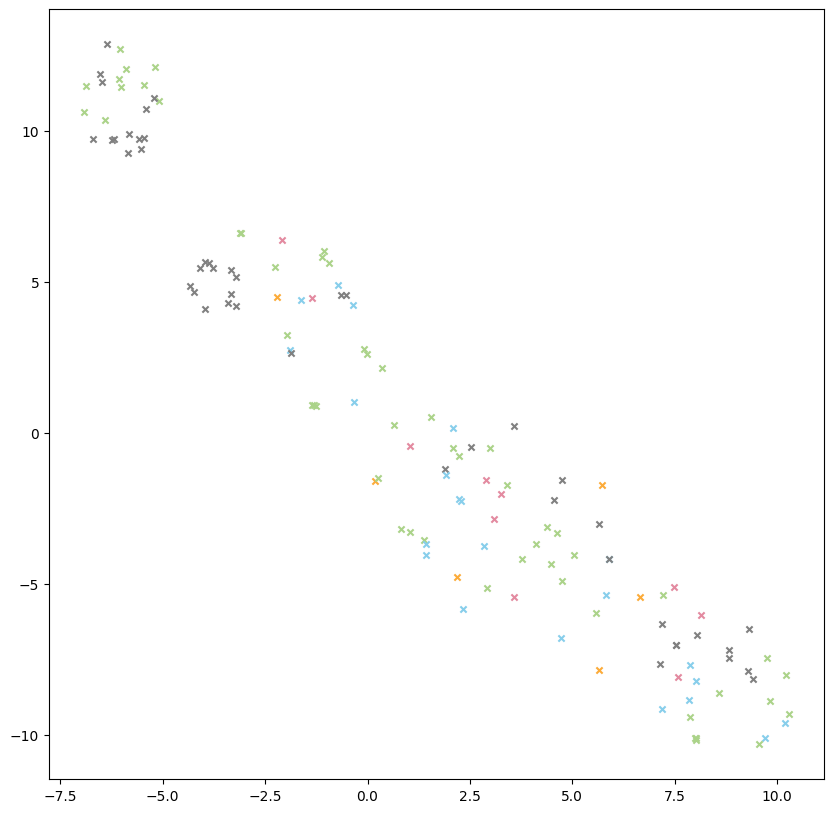

In [15]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
import numpy as np

# Assuming X, plot_data, and plot_labels are defined as before
# Also assuming bool_values is your list/array of boolean values

X = torch.stack(plot_data).cpu().numpy()

# Extract labels for each point
labelsNums = plot_labels

# Perform t-SNE dimensionality reduction
X_embedded = TSNE(n_components=2, init='random').fit_transform(X)

# Assuming 'cc' is a colormap, you might need to adjust this to fit your actual colormap variable
# Generate an array of colors for each label
unique_labels = np.unique(labelsNums)
colors = plt.cm.get_cmap(cc, len(unique_labels))  # Adjust 'cc' as needed to your colormap name
label_to_color = {label: colors(i / len(unique_labels)) for i, label in enumerate(unique_labels)}
colors_array = np.array([label_to_color[label] for label in labelsNums])

# Create the scatter plot
plt.figure(figsize=(10, 10))

# Iterate through each datapoint
for i in range(len(X_embedded)):
    marker = 'x' if short_data_flags[i] else 'o'  # Choose the marker based on the boolean value
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=colors_array[i], s=20, alpha=1, marker=marker)

# Set the background color to black
# plt.gca().set_facecolor('white')
# # Adjust the color of the ticks and labels for better visibility
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# plt.xlabel('Component 1', color='white')
# plt.ylabel('Component 2', color='white')

plt.show()


In [16]:
# Load the CodeBERT tokenizer (adjust the model_name as needed)
model_name = "microsoft/codebert-base"
codebert_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


class SiameseNetwork(nn.Module):
    def __init__(self, embedding_size):
        super(SiameseNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(embedding_size, int(embedding_size/2)),
            nn.ReLU(inplace=True),
            nn.Linear(int(embedding_size/2), int(embedding_size/4)),
            nn.ReLU(inplace=True),
            nn.Linear(int(embedding_size/4), embedding_size)
        )

    def forward(self, x):
        output = self.fc(x)
        return output

In [17]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        distance_positive = (anchor - positive).pow(2).sum(1)
        distance_negative = (anchor - negative).pow(2).sum(1)
        losses = torch.relu(distance_positive - distance_negative + self.margin)
        return losses.mean()

In [18]:
learning_rate = 1e-5
num_epochs = 450
embed_size = m_len  # This should match the output size of CodeBERT
siamese_network = SiameseNetwork(embed_size).to(device)
criterion = TripletLoss(margin=1.0)
optimizer = optim.Adam(siamese_network.parameters(), lr=learning_rate)
triplet_loss = TripletLoss().to(device)

In [19]:
# from transformers import get_linear_schedule_with_warmup
# warmup_Frac = 0.1
# total_iter = num_epochs * len(train_dataloader)
# scheduler = get_linear_schedule_with_warmup(optimizer, int(warmup_Frac * total_iter), total_iter)

In [20]:
from tqdm import tqdm
best_loss = 100.0
num_epochs = 400
epoch_loss_list = []
model_name = "FlakyXbert_IDoFT_project_" + project_name + '_final.pth'
for epoch in range(num_epochs):
    total_loss = 0.0
    siamese_network.train()
    for batch in tqdm(train_dataloader):

        labels = (batch['label']).to(device)
        batch_anchor = (batch['anchor']).to(device)
        batch_positive = (batch['positive']).to(device)
        batch_negative = (batch['negative']).to(device)

        anchor_output = siamese_network(batch_anchor)
        positive_out = siamese_network(batch_positive)
        negative_out = siamese_network(batch_negative)

        loss = criterion(anchor_output, positive_out, negative_out)
        optimizer.zero_grad()
        loss.backward()
        # torch.nn.utils.clip_grad_norm_(siamese_network.parameters(), max_norm=2.0)        
        optimizer.step()
        # scheduler.step()

        total_loss += loss.item()
        if total_loss <= best_loss:
            # print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
            print("Loss improved saving model")
            torch.save(siamese_network.state_dict(), model_name)
            best_loss = total_loss
        
            
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
    # The line `epoch_loss_list.append(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")` is attempting to append a formatted string to a list named `epoch_loss_list`. This string contains information about the current epoch number, total number of epochs, and the average loss calculated for that epoch. However, in the provided code snippet, the `epoch_loss_list` list is not defined or used anywhere else in the code.
    epoch_loss_list.append(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
    

 12%|█▏        | 2/17 [00:00<00:01, 12.48it/s]

Loss improved saving model


100%|██████████| 17/17 [00:01<00:00, 16.24it/s]


Epoch 1/400, Loss: 0.9702882065492517


100%|██████████| 17/17 [00:00<00:00, 18.22it/s]


Epoch 2/400, Loss: 0.9705095150891472


100%|██████████| 17/17 [00:00<00:00, 18.03it/s]


Epoch 3/400, Loss: 0.9702477034400491


100%|██████████| 17/17 [00:00<00:00, 17.94it/s]


Epoch 4/400, Loss: 1.012451410293579


100%|██████████| 17/17 [00:00<00:00, 18.10it/s]


Epoch 5/400, Loss: 0.9849341231233933


100%|██████████| 17/17 [00:00<00:00, 17.56it/s]


Epoch 6/400, Loss: 0.9882488250732422


100%|██████████| 17/17 [00:00<00:00, 17.56it/s]


Epoch 7/400, Loss: 0.9345274742911843


100%|██████████| 17/17 [00:00<00:00, 17.87it/s]


Epoch 8/400, Loss: 0.9695641293245203


100%|██████████| 17/17 [00:00<00:00, 18.04it/s]


Epoch 9/400, Loss: 0.9733537119977614


100%|██████████| 17/17 [00:00<00:00, 17.62it/s]


Epoch 10/400, Loss: 0.9816979730830473


100%|██████████| 17/17 [00:00<00:00, 17.66it/s]


Epoch 11/400, Loss: 0.9420496365603279


100%|██████████| 17/17 [00:00<00:00, 17.55it/s]


Epoch 12/400, Loss: 0.9335973473156199


100%|██████████| 17/17 [00:00<00:00, 18.06it/s]


Epoch 13/400, Loss: 0.9605676882407245


100%|██████████| 17/17 [00:00<00:00, 17.83it/s]


Epoch 14/400, Loss: 0.9691586284076467


100%|██████████| 17/17 [00:00<00:00, 17.85it/s]


Epoch 15/400, Loss: 0.9392870594473446


 12%|█▏        | 2/17 [00:00<00:00, 17.28it/s]

Loss improved saving model


100%|██████████| 17/17 [00:00<00:00, 17.72it/s]


Epoch 16/400, Loss: 0.9165285404990701


100%|██████████| 17/17 [00:00<00:00, 17.99it/s]


Epoch 17/400, Loss: 0.9561298770063064


100%|██████████| 17/17 [00:00<00:00, 17.95it/s]


Epoch 18/400, Loss: 0.9387505931012771


100%|██████████| 17/17 [00:00<00:00, 17.94it/s]


Epoch 19/400, Loss: 0.957949326318853


100%|██████████| 17/17 [00:00<00:00, 17.93it/s]


Epoch 20/400, Loss: 0.9456189730588127


 12%|█▏        | 2/17 [00:00<00:00, 18.02it/s]

Loss improved saving model


100%|██████████| 17/17 [00:00<00:00, 18.02it/s]


Epoch 21/400, Loss: 0.8931665280286003


100%|██████████| 17/17 [00:00<00:00, 18.12it/s]


Epoch 22/400, Loss: 0.9226269476553973


100%|██████████| 17/17 [00:00<00:00, 18.00it/s]


Epoch 23/400, Loss: 0.8935359295676736


100%|██████████| 17/17 [00:00<00:00, 17.96it/s]


Epoch 24/400, Loss: 0.89058277536841


100%|██████████| 17/17 [00:00<00:00, 17.86it/s]


Epoch 25/400, Loss: 0.8330383265719694


100%|██████████| 17/17 [00:00<00:00, 17.63it/s]


Epoch 26/400, Loss: 0.8737545153673958


100%|██████████| 17/17 [00:00<00:00, 17.67it/s]


Epoch 27/400, Loss: 0.802045951871311


100%|██████████| 17/17 [00:00<00:00, 17.75it/s]


Epoch 28/400, Loss: 0.9474801070549909


100%|██████████| 17/17 [00:00<00:00, 18.06it/s]


Epoch 29/400, Loss: 0.854510461582857


100%|██████████| 17/17 [00:00<00:00, 17.43it/s]


Epoch 30/400, Loss: 0.8484110972460579


100%|██████████| 17/17 [00:00<00:00, 17.65it/s]


Epoch 31/400, Loss: 0.8172989943448234


100%|██████████| 17/17 [00:00<00:00, 17.48it/s]


Epoch 32/400, Loss: 0.8145976066589355


100%|██████████| 17/17 [00:00<00:00, 17.95it/s]


Epoch 33/400, Loss: 0.7781373805859509


100%|██████████| 17/17 [00:00<00:00, 18.12it/s]


Epoch 34/400, Loss: 0.8252192314933328


100%|██████████| 17/17 [00:00<00:00, 17.94it/s]


Epoch 35/400, Loss: 0.761916318360497


100%|██████████| 17/17 [00:00<00:00, 18.07it/s]


Epoch 36/400, Loss: 0.8630870159934548


 12%|█▏        | 2/17 [00:00<00:00, 18.17it/s]

Loss improved saving model


100%|██████████| 17/17 [00:00<00:00, 17.82it/s]


Epoch 37/400, Loss: 0.8105212222127354


100%|██████████| 17/17 [00:00<00:00, 18.02it/s]


Epoch 38/400, Loss: 0.8053673751213971


100%|██████████| 17/17 [00:00<00:00, 17.62it/s]


Epoch 39/400, Loss: 0.7305823073667639


100%|██████████| 17/17 [00:00<00:00, 17.50it/s]


Epoch 40/400, Loss: 0.849679072113598


100%|██████████| 17/17 [00:00<00:00, 17.43it/s]


Epoch 41/400, Loss: 0.7979271937819088


100%|██████████| 17/17 [00:00<00:00, 17.78it/s]


Epoch 42/400, Loss: 0.755612932583865


100%|██████████| 17/17 [00:00<00:00, 17.68it/s]


Epoch 43/400, Loss: 0.84357851042467


100%|██████████| 17/17 [00:00<00:00, 18.09it/s]


Epoch 44/400, Loss: 0.7885066165643579


100%|██████████| 17/17 [00:00<00:00, 18.10it/s]


Epoch 45/400, Loss: 0.8024978848064647


100%|██████████| 17/17 [00:00<00:00, 17.45it/s]


Epoch 46/400, Loss: 0.7641064454527462


100%|██████████| 17/17 [00:00<00:00, 18.02it/s]


Epoch 47/400, Loss: 0.8501380541745354


 12%|█▏        | 2/17 [00:00<00:00, 17.29it/s]

Loss improved saving model


100%|██████████| 17/17 [00:00<00:00, 17.77it/s]


Epoch 48/400, Loss: 0.7743389957091388


100%|██████████| 17/17 [00:00<00:00, 17.72it/s]


Epoch 49/400, Loss: 0.7267823008929982


100%|██████████| 17/17 [00:00<00:00, 18.01it/s]


Epoch 50/400, Loss: 0.6952080498723423


100%|██████████| 17/17 [00:00<00:00, 17.44it/s]


Epoch 51/400, Loss: 0.8478841325815987


100%|██████████| 17/17 [00:00<00:00, 18.05it/s]


Epoch 52/400, Loss: 0.7975771409623763


100%|██████████| 17/17 [00:00<00:00, 18.02it/s]


Epoch 53/400, Loss: 0.7709013819694519


100%|██████████| 17/17 [00:00<00:00, 18.03it/s]


Epoch 54/400, Loss: 0.8216767845784917


100%|██████████| 17/17 [00:00<00:00, 17.79it/s]


Epoch 55/400, Loss: 0.7363762785406673


100%|██████████| 17/17 [00:00<00:00, 17.84it/s]


Epoch 56/400, Loss: 0.7424507123582503


100%|██████████| 17/17 [00:00<00:00, 18.13it/s]


Epoch 57/400, Loss: 0.8161989520577824


100%|██████████| 17/17 [00:00<00:00, 17.88it/s]


Epoch 58/400, Loss: 0.7724072231965906


100%|██████████| 17/17 [00:00<00:00, 17.85it/s]


Epoch 59/400, Loss: 0.719617592937806


100%|██████████| 17/17 [00:00<00:00, 17.58it/s]


Epoch 60/400, Loss: 0.7991744385046118


100%|██████████| 17/17 [00:00<00:00, 17.85it/s]


Epoch 61/400, Loss: 0.6884323551374323


100%|██████████| 17/17 [00:00<00:00, 17.76it/s]


Epoch 62/400, Loss: 0.6420744219247032


100%|██████████| 17/17 [00:00<00:00, 17.81it/s]


Epoch 63/400, Loss: 0.6444997296613806


100%|██████████| 17/17 [00:00<00:00, 18.21it/s]


Epoch 64/400, Loss: 0.7551235819564146


100%|██████████| 17/17 [00:00<00:00, 17.86it/s]


Epoch 65/400, Loss: 0.7286917234168333


100%|██████████| 17/17 [00:00<00:00, 17.75it/s]


Epoch 66/400, Loss: 0.6762130313059863


100%|██████████| 17/17 [00:00<00:00, 17.76it/s]


Epoch 67/400, Loss: 0.8358034596723669


100%|██████████| 17/17 [00:00<00:00, 17.74it/s]


Epoch 68/400, Loss: 0.7347976197214687


100%|██████████| 17/17 [00:00<00:00, 17.86it/s]


Epoch 69/400, Loss: 0.7238723039627075


100%|██████████| 17/17 [00:00<00:00, 17.92it/s]


Epoch 70/400, Loss: 0.7012729644775391


100%|██████████| 17/17 [00:00<00:00, 17.94it/s]


Epoch 71/400, Loss: 0.7021852521335378


100%|██████████| 17/17 [00:00<00:00, 17.77it/s]


Epoch 72/400, Loss: 0.7196377200238845


100%|██████████| 17/17 [00:00<00:00, 17.96it/s]


Epoch 73/400, Loss: 0.6805524159880245


100%|██████████| 17/17 [00:00<00:00, 17.89it/s]


Epoch 74/400, Loss: 0.6533076412537518


100%|██████████| 17/17 [00:00<00:00, 17.80it/s]


Epoch 75/400, Loss: 0.6790258551345152


100%|██████████| 17/17 [00:00<00:00, 17.78it/s]


Epoch 76/400, Loss: 0.6665208462406608


100%|██████████| 17/17 [00:00<00:00, 17.88it/s]


Epoch 77/400, Loss: 0.8188671767711639


100%|██████████| 17/17 [00:00<00:00, 18.06it/s]


Epoch 78/400, Loss: 0.6667311892789953


100%|██████████| 17/17 [00:00<00:00, 17.70it/s]


Epoch 79/400, Loss: 0.792799150242525


100%|██████████| 17/17 [00:00<00:00, 18.04it/s]


Epoch 80/400, Loss: 0.6396751877139596


100%|██████████| 17/17 [00:00<00:00, 17.49it/s]


Epoch 81/400, Loss: 0.6831399588023915


100%|██████████| 17/17 [00:00<00:00, 17.89it/s]


Epoch 82/400, Loss: 0.6404404710320866


100%|██████████| 17/17 [00:00<00:00, 17.45it/s]


Epoch 83/400, Loss: 0.7286813031224644


100%|██████████| 17/17 [00:01<00:00, 16.78it/s]


Epoch 84/400, Loss: 0.6719645033864414


100%|██████████| 17/17 [00:00<00:00, 17.55it/s]


Epoch 85/400, Loss: 0.709411579019883


100%|██████████| 17/17 [00:00<00:00, 17.46it/s]


Epoch 86/400, Loss: 0.6933526326628292


100%|██████████| 17/17 [00:00<00:00, 17.93it/s]


Epoch 87/400, Loss: 0.6986429551068474


100%|██████████| 17/17 [00:00<00:00, 17.74it/s]


Epoch 88/400, Loss: 0.6910758509355432


100%|██████████| 17/17 [00:00<00:00, 17.91it/s]


Epoch 89/400, Loss: 0.6953340260421529


100%|██████████| 17/17 [00:00<00:00, 17.94it/s]


Epoch 90/400, Loss: 0.607604428249247


100%|██████████| 17/17 [00:00<00:00, 17.71it/s]


Epoch 91/400, Loss: 0.6457350937759175


100%|██████████| 17/17 [00:00<00:00, 17.49it/s]


Epoch 92/400, Loss: 0.6730279221254236


100%|██████████| 17/17 [00:00<00:00, 17.75it/s]


Epoch 93/400, Loss: 0.6272399951429928


100%|██████████| 17/17 [00:01<00:00, 16.60it/s]


Epoch 94/400, Loss: 0.662818968296051


100%|██████████| 17/17 [00:01<00:00, 16.96it/s]


Epoch 95/400, Loss: 0.6432562873643988


100%|██████████| 17/17 [00:01<00:00, 16.92it/s]


Epoch 96/400, Loss: 0.6849360956865198


100%|██████████| 17/17 [00:00<00:00, 17.85it/s]


Epoch 97/400, Loss: 0.6768277760814218


100%|██████████| 17/17 [00:00<00:00, 18.05it/s]


Epoch 98/400, Loss: 0.6644982888418085


100%|██████████| 17/17 [00:00<00:00, 17.31it/s]


Epoch 99/400, Loss: 0.657513662296183


100%|██████████| 17/17 [00:00<00:00, 17.78it/s]


Epoch 100/400, Loss: 0.572095488800722


100%|██████████| 17/17 [00:00<00:00, 17.72it/s]


Epoch 101/400, Loss: 0.7253864179639256


100%|██████████| 17/17 [00:00<00:00, 17.31it/s]


Epoch 102/400, Loss: 0.7112769261002541


100%|██████████| 17/17 [00:01<00:00, 16.64it/s]


Epoch 103/400, Loss: 0.6542309136951671


100%|██████████| 17/17 [00:00<00:00, 17.85it/s]


Epoch 104/400, Loss: 0.6059109840322944


100%|██████████| 17/17 [00:00<00:00, 17.49it/s]


Epoch 105/400, Loss: 0.6479077707318699


100%|██████████| 17/17 [00:00<00:00, 17.66it/s]


Epoch 106/400, Loss: 0.6697760049034568


100%|██████████| 17/17 [00:00<00:00, 17.61it/s]


Epoch 107/400, Loss: 0.6588436347596786


100%|██████████| 17/17 [00:00<00:00, 17.56it/s]


Epoch 108/400, Loss: 0.5676958455758936


 12%|█▏        | 2/17 [00:00<00:00, 16.63it/s]

Loss improved saving model


100%|██████████| 17/17 [00:00<00:00, 17.48it/s]


Epoch 109/400, Loss: 0.648763037779752


100%|██████████| 17/17 [00:00<00:00, 17.64it/s]


Epoch 110/400, Loss: 0.5917090983951793


100%|██████████| 17/17 [00:00<00:00, 17.31it/s]


Epoch 111/400, Loss: 0.6496439646272099


100%|██████████| 17/17 [00:00<00:00, 17.73it/s]


Epoch 112/400, Loss: 0.5736351714414709


100%|██████████| 17/17 [00:00<00:00, 17.50it/s]


Epoch 113/400, Loss: 0.6087098191766178


100%|██████████| 17/17 [00:00<00:00, 17.32it/s]


Epoch 114/400, Loss: 0.6853111684322357


100%|██████████| 17/17 [00:00<00:00, 17.83it/s]


Epoch 115/400, Loss: 0.6665810399195727


100%|██████████| 17/17 [00:00<00:00, 17.78it/s]


Epoch 116/400, Loss: 0.5472944466506734


100%|██████████| 17/17 [00:00<00:00, 17.41it/s]


Epoch 117/400, Loss: 0.5895756991470561


100%|██████████| 17/17 [00:00<00:00, 17.44it/s]


Epoch 118/400, Loss: 0.6692639519186581


100%|██████████| 17/17 [00:00<00:00, 17.23it/s]


Epoch 119/400, Loss: 0.528971452923382


100%|██████████| 17/17 [00:00<00:00, 17.52it/s]


Epoch 120/400, Loss: 0.5642283330945408


100%|██████████| 17/17 [00:00<00:00, 17.58it/s]


Epoch 121/400, Loss: 0.6131412755040562


100%|██████████| 17/17 [00:00<00:00, 17.72it/s]


Epoch 122/400, Loss: 0.5622064295937034


 12%|█▏        | 2/17 [00:00<00:00, 17.35it/s]

Loss improved saving model


100%|██████████| 17/17 [00:00<00:00, 17.83it/s]


Epoch 123/400, Loss: 0.5728214716210085


100%|██████████| 17/17 [00:00<00:00, 17.59it/s]


Epoch 124/400, Loss: 0.552327894112643


 12%|█▏        | 2/17 [00:00<00:00, 17.05it/s]

Loss improved saving model


100%|██████████| 17/17 [00:00<00:00, 17.48it/s]


Epoch 125/400, Loss: 0.7175197496133692


100%|██████████| 17/17 [00:00<00:00, 17.67it/s]


Epoch 126/400, Loss: 0.6165547879303203


100%|██████████| 17/17 [00:00<00:00, 17.53it/s]


Epoch 127/400, Loss: 0.5787294410607394


100%|██████████| 17/17 [00:00<00:00, 17.73it/s]


Epoch 128/400, Loss: 0.6148515869589413


100%|██████████| 17/17 [00:00<00:00, 17.89it/s]


Epoch 129/400, Loss: 0.5665484868428287


100%|██████████| 17/17 [00:00<00:00, 17.58it/s]


Epoch 130/400, Loss: 0.554516531088773


100%|██████████| 17/17 [00:00<00:00, 17.88it/s]


Epoch 131/400, Loss: 0.6128302584676182


100%|██████████| 17/17 [00:00<00:00, 17.64it/s]


Epoch 132/400, Loss: 0.6344384134692305


100%|██████████| 17/17 [00:00<00:00, 17.80it/s]


Epoch 133/400, Loss: 0.617900922017939


100%|██████████| 17/17 [00:00<00:00, 17.49it/s]


Epoch 134/400, Loss: 0.5350675328689463


100%|██████████| 17/17 [00:00<00:00, 17.50it/s]


Epoch 135/400, Loss: 0.5865626019590041


100%|██████████| 17/17 [00:00<00:00, 17.49it/s]


Epoch 136/400, Loss: 0.6123485372346991


100%|██████████| 17/17 [00:00<00:00, 17.47it/s]


Epoch 137/400, Loss: 0.4773731126504786


100%|██████████| 17/17 [00:00<00:00, 17.47it/s]


Epoch 138/400, Loss: 0.614742587594425


100%|██████████| 17/17 [00:00<00:00, 17.58it/s]


Epoch 139/400, Loss: 0.553431485505665


100%|██████████| 17/17 [00:00<00:00, 17.35it/s]


Epoch 140/400, Loss: 0.5283155625357348


100%|██████████| 17/17 [00:00<00:00, 17.78it/s]


Epoch 141/400, Loss: 0.569078782463775


100%|██████████| 17/17 [00:00<00:00, 17.51it/s]


Epoch 142/400, Loss: 0.5023237370392856


100%|██████████| 17/17 [00:00<00:00, 17.71it/s]


Epoch 143/400, Loss: 0.5588991589405957


100%|██████████| 17/17 [00:00<00:00, 17.75it/s]


Epoch 144/400, Loss: 0.5316223151543561


100%|██████████| 17/17 [00:00<00:00, 17.96it/s]


Epoch 145/400, Loss: 0.5089546959189808


100%|██████████| 17/17 [00:00<00:00, 17.74it/s]


Epoch 146/400, Loss: 0.5236051994211534


100%|██████████| 17/17 [00:00<00:00, 17.62it/s]


Epoch 147/400, Loss: 0.4372418461477055


100%|██████████| 17/17 [00:00<00:00, 17.60it/s]


Epoch 148/400, Loss: 0.5490610319025376


100%|██████████| 17/17 [00:00<00:00, 17.78it/s]


Epoch 149/400, Loss: 0.4887822770020541


100%|██████████| 17/17 [00:00<00:00, 17.46it/s]


Epoch 150/400, Loss: 0.5376500395290992


100%|██████████| 17/17 [00:00<00:00, 17.66it/s]


Epoch 151/400, Loss: 0.5200224641491386


100%|██████████| 17/17 [00:00<00:00, 17.57it/s]


Epoch 152/400, Loss: 0.49568338253918814


100%|██████████| 17/17 [00:00<00:00, 17.37it/s]


Epoch 153/400, Loss: 0.4224257008994327


100%|██████████| 17/17 [00:00<00:00, 17.73it/s]


Epoch 154/400, Loss: 0.5019644831909853


100%|██████████| 17/17 [00:00<00:00, 17.84it/s]


Epoch 155/400, Loss: 0.47735394186833324


100%|██████████| 17/17 [00:00<00:00, 17.89it/s]


Epoch 156/400, Loss: 0.4953870343811372


100%|██████████| 17/17 [00:00<00:00, 17.86it/s]


Epoch 157/400, Loss: 0.45452164507964077


100%|██████████| 17/17 [00:00<00:00, 17.97it/s]


Epoch 158/400, Loss: 0.5824051972697762


100%|██████████| 17/17 [00:00<00:00, 17.98it/s]


Epoch 159/400, Loss: 0.5393213875153485


100%|██████████| 17/17 [00:00<00:00, 18.01it/s]


Epoch 160/400, Loss: 0.5376756927546333


100%|██████████| 17/17 [00:00<00:00, 17.83it/s]


Epoch 161/400, Loss: 0.5475795058643117


 12%|█▏        | 2/17 [00:00<00:00, 18.07it/s]

Loss improved saving model


100%|██████████| 17/17 [00:00<00:00, 17.73it/s]


Epoch 162/400, Loss: 0.33716888681930657


 12%|█▏        | 2/17 [00:00<00:00, 16.33it/s]

Loss improved saving model


100%|██████████| 17/17 [00:00<00:00, 17.31it/s]


Epoch 163/400, Loss: 0.4076395727255765


100%|██████████| 17/17 [00:00<00:00, 17.70it/s]


Epoch 164/400, Loss: 0.5167736687204417


100%|██████████| 17/17 [00:00<00:00, 17.69it/s]


Epoch 165/400, Loss: 0.4763070616651984


100%|██████████| 17/17 [00:00<00:00, 17.89it/s]


Epoch 166/400, Loss: 0.5893107880564297


100%|██████████| 17/17 [00:00<00:00, 17.75it/s]


Epoch 167/400, Loss: 0.4893089401371339


100%|██████████| 17/17 [00:00<00:00, 17.71it/s]


Epoch 168/400, Loss: 0.48963740643332987


100%|██████████| 17/17 [00:00<00:00, 17.65it/s]


Epoch 169/400, Loss: 0.39585207490360036


100%|██████████| 17/17 [00:00<00:00, 17.66it/s]


Epoch 170/400, Loss: 0.37035473655251894


100%|██████████| 17/17 [00:00<00:00, 17.64it/s]


Epoch 171/400, Loss: 0.5023698640220305


100%|██████████| 17/17 [00:00<00:00, 17.84it/s]


Epoch 172/400, Loss: 0.45414779379087333


100%|██████████| 17/17 [00:00<00:00, 17.92it/s]


Epoch 173/400, Loss: 0.521397541551029


100%|██████████| 17/17 [00:01<00:00, 16.79it/s]


Epoch 174/400, Loss: 0.4463898276581484


100%|██████████| 17/17 [00:00<00:00, 17.67it/s]


Epoch 175/400, Loss: 0.5050534513943336


100%|██████████| 17/17 [00:00<00:00, 17.90it/s]


Epoch 176/400, Loss: 0.49146347712067995


100%|██████████| 17/17 [00:00<00:00, 17.77it/s]


Epoch 177/400, Loss: 0.45493585879311843


100%|██████████| 17/17 [00:00<00:00, 17.46it/s]


Epoch 178/400, Loss: 0.4625372720115325


100%|██████████| 17/17 [00:00<00:00, 17.80it/s]


Epoch 179/400, Loss: 0.39986574693637733


100%|██████████| 17/17 [00:00<00:00, 17.77it/s]


Epoch 180/400, Loss: 0.41359498088850694


100%|██████████| 17/17 [00:00<00:00, 17.79it/s]


Epoch 181/400, Loss: 0.5224493224831188


100%|██████████| 17/17 [00:00<00:00, 17.47it/s]


Epoch 182/400, Loss: 0.4879380289246054


100%|██████████| 17/17 [00:00<00:00, 17.87it/s]


Epoch 183/400, Loss: 0.4776826571015751


100%|██████████| 17/17 [00:00<00:00, 17.81it/s]


Epoch 184/400, Loss: 0.4290804915568408


100%|██████████| 17/17 [00:00<00:00, 17.63it/s]


Epoch 185/400, Loss: 0.3943626490585944


100%|██████████| 17/17 [00:00<00:00, 18.08it/s]


Epoch 186/400, Loss: 0.4803261257269803


100%|██████████| 17/17 [00:00<00:00, 17.48it/s]


Epoch 187/400, Loss: 0.4664776781026055


100%|██████████| 17/17 [00:00<00:00, 17.75it/s]


Epoch 188/400, Loss: 0.49557239912888584


100%|██████████| 17/17 [00:00<00:00, 17.52it/s]


Epoch 189/400, Loss: 0.4580584128989893


100%|██████████| 17/17 [00:00<00:00, 17.85it/s]


Epoch 190/400, Loss: 0.39884980636484485


100%|██████████| 17/17 [00:00<00:00, 17.67it/s]


Epoch 191/400, Loss: 0.4065268521799761


100%|██████████| 17/17 [00:00<00:00, 17.78it/s]


Epoch 192/400, Loss: 0.4585995078086853


100%|██████████| 17/17 [00:00<00:00, 17.59it/s]


Epoch 193/400, Loss: 0.4079992438063902


100%|██████████| 17/17 [00:00<00:00, 17.61it/s]


Epoch 194/400, Loss: 0.30768679345355315


100%|██████████| 17/17 [00:00<00:00, 17.88it/s]


Epoch 195/400, Loss: 0.4121697474928463


100%|██████████| 17/17 [00:00<00:00, 17.89it/s]


Epoch 196/400, Loss: 0.47091470395817475


100%|██████████| 17/17 [00:00<00:00, 17.76it/s]


Epoch 197/400, Loss: 0.45868391017703447


100%|██████████| 17/17 [00:00<00:00, 17.93it/s]


Epoch 198/400, Loss: 0.39369674772024155


100%|██████████| 17/17 [00:00<00:00, 17.62it/s]


Epoch 199/400, Loss: 0.42387750218896303


100%|██████████| 17/17 [00:00<00:00, 17.83it/s]


Epoch 200/400, Loss: 0.35233038444729414


100%|██████████| 17/17 [00:00<00:00, 17.78it/s]


Epoch 201/400, Loss: 0.4125346317887306


100%|██████████| 17/17 [00:00<00:00, 17.71it/s]


Epoch 202/400, Loss: 0.2908838102046181


100%|██████████| 17/17 [00:00<00:00, 17.79it/s]


Epoch 203/400, Loss: 0.3488243397544412


100%|██████████| 17/17 [00:00<00:00, 17.68it/s]


Epoch 204/400, Loss: 0.39709799517603483


100%|██████████| 17/17 [00:00<00:00, 17.67it/s]


Epoch 205/400, Loss: 0.36050918435349183


100%|██████████| 17/17 [00:00<00:00, 17.73it/s]


Epoch 206/400, Loss: 0.42141592239632325


100%|██████████| 17/17 [00:00<00:00, 17.75it/s]


Epoch 207/400, Loss: 0.4163622409105301


100%|██████████| 17/17 [00:00<00:00, 17.72it/s]


Epoch 208/400, Loss: 0.4160710766034968


100%|██████████| 17/17 [00:00<00:00, 17.87it/s]


Epoch 209/400, Loss: 0.3260584977619788


100%|██████████| 17/17 [00:00<00:00, 17.73it/s]


Epoch 210/400, Loss: 0.475408178041963


100%|██████████| 17/17 [00:00<00:00, 17.74it/s]


Epoch 211/400, Loss: 0.37879843396299023


100%|██████████| 17/17 [00:00<00:00, 17.82it/s]


Epoch 212/400, Loss: 0.46085955816156726


100%|██████████| 17/17 [00:00<00:00, 17.80it/s]


Epoch 213/400, Loss: 0.4093932917012888


100%|██████████| 17/17 [00:00<00:00, 17.75it/s]


Epoch 214/400, Loss: 0.3476412445306778


100%|██████████| 17/17 [00:00<00:00, 17.68it/s]


Epoch 215/400, Loss: 0.37566809180904837


100%|██████████| 17/17 [00:00<00:00, 17.73it/s]


Epoch 216/400, Loss: 0.3310050122878131


100%|██████████| 17/17 [00:00<00:00, 17.71it/s]


Epoch 217/400, Loss: 0.3925117933574845


100%|██████████| 17/17 [00:00<00:00, 17.56it/s]


Epoch 218/400, Loss: 0.378816079129191


100%|██████████| 17/17 [00:00<00:00, 17.55it/s]


Epoch 219/400, Loss: 0.3004624668289633


100%|██████████| 17/17 [00:00<00:00, 17.20it/s]


Epoch 220/400, Loss: 0.33021390613387613


100%|██████████| 17/17 [00:00<00:00, 17.71it/s]


Epoch 221/400, Loss: 0.3911210162674679


100%|██████████| 17/17 [00:00<00:00, 17.86it/s]


Epoch 222/400, Loss: 0.4124785249724108


100%|██████████| 17/17 [00:00<00:00, 17.65it/s]


Epoch 223/400, Loss: 0.41378101837985654


100%|██████████| 17/17 [00:00<00:00, 17.88it/s]


Epoch 224/400, Loss: 0.3415355042499654


100%|██████████| 17/17 [00:00<00:00, 17.86it/s]


Epoch 225/400, Loss: 0.3907213912290685


100%|██████████| 17/17 [00:00<00:00, 17.28it/s]


Epoch 226/400, Loss: 0.35572368783109326


100%|██████████| 17/17 [00:00<00:00, 17.85it/s]


Epoch 227/400, Loss: 0.3286457460592775


100%|██████████| 17/17 [00:00<00:00, 17.38it/s]


Epoch 228/400, Loss: 0.2478905052823179


100%|██████████| 17/17 [00:00<00:00, 17.71it/s]


Epoch 229/400, Loss: 0.3178200432482888


 12%|█▏        | 2/17 [00:00<00:00, 17.61it/s]

Loss improved saving model


100%|██████████| 17/17 [00:00<00:00, 17.67it/s]


Epoch 230/400, Loss: 0.3231412023305893


100%|██████████| 17/17 [00:00<00:00, 17.64it/s]


Epoch 231/400, Loss: 0.4131961149327895


100%|██████████| 17/17 [00:00<00:00, 17.85it/s]


Epoch 232/400, Loss: 0.32466587380451317


100%|██████████| 17/17 [00:00<00:00, 17.85it/s]


Epoch 233/400, Loss: 0.3741998058908126


100%|██████████| 17/17 [00:00<00:00, 17.42it/s]


Epoch 234/400, Loss: 0.3142615306903334


100%|██████████| 17/17 [00:00<00:00, 17.76it/s]


Epoch 235/400, Loss: 0.39974142698680654


100%|██████████| 17/17 [00:00<00:00, 17.64it/s]


Epoch 236/400, Loss: 0.3530630109941258


100%|██████████| 17/17 [00:00<00:00, 17.85it/s]


Epoch 237/400, Loss: 0.3044228483648861


100%|██████████| 17/17 [00:00<00:00, 17.72it/s]


Epoch 238/400, Loss: 0.32066988945007324


100%|██████████| 17/17 [00:00<00:00, 17.73it/s]


Epoch 239/400, Loss: 0.24870039128205357


100%|██████████| 17/17 [00:00<00:00, 17.50it/s]


Epoch 240/400, Loss: 0.3265265116796774


100%|██████████| 17/17 [00:00<00:00, 17.73it/s]


Epoch 241/400, Loss: 0.2961471654913005


100%|██████████| 17/17 [00:00<00:00, 17.93it/s]


Epoch 242/400, Loss: 0.3815447780139306


100%|██████████| 17/17 [00:00<00:00, 17.83it/s]


Epoch 243/400, Loss: 0.39941811386276693


100%|██████████| 17/17 [00:00<00:00, 17.89it/s]


Epoch 244/400, Loss: 0.34478940332637115


100%|██████████| 17/17 [00:00<00:00, 17.84it/s]


Epoch 245/400, Loss: 0.4004840947249356


100%|██████████| 17/17 [00:00<00:00, 17.76it/s]


Epoch 246/400, Loss: 0.42655546349637646


100%|██████████| 17/17 [00:00<00:00, 17.57it/s]


Epoch 247/400, Loss: 0.39621976763010025


100%|██████████| 17/17 [00:00<00:00, 17.42it/s]


Epoch 248/400, Loss: 0.2977696823723176


100%|██████████| 17/17 [00:00<00:00, 17.35it/s]


Epoch 249/400, Loss: 0.3350079537314527


100%|██████████| 17/17 [00:00<00:00, 17.47it/s]


Epoch 250/400, Loss: 0.32814674868303184


100%|██████████| 17/17 [00:00<00:00, 17.88it/s]


Epoch 251/400, Loss: 0.39573731361066594


100%|██████████| 17/17 [00:00<00:00, 17.75it/s]


Epoch 252/400, Loss: 0.40186312049627304


100%|██████████| 17/17 [00:00<00:00, 17.04it/s]


Epoch 253/400, Loss: 0.3409050878356485


100%|██████████| 17/17 [00:00<00:00, 17.11it/s]


Epoch 254/400, Loss: 0.3689509963288027


100%|██████████| 17/17 [00:01<00:00, 16.76it/s]


Epoch 255/400, Loss: 0.36744702826527986


100%|██████████| 17/17 [00:00<00:00, 17.45it/s]


Epoch 256/400, Loss: 0.2786235073033501


100%|██████████| 17/17 [00:00<00:00, 17.81it/s]


Epoch 257/400, Loss: 0.4051646577084766


 12%|█▏        | 2/17 [00:00<00:00, 17.03it/s]

Loss improved saving model


100%|██████████| 17/17 [00:00<00:00, 17.52it/s]


Epoch 258/400, Loss: 0.29530469810261445


100%|██████████| 17/17 [00:00<00:00, 17.57it/s]


Epoch 259/400, Loss: 0.30482073741800647


100%|██████████| 17/17 [00:00<00:00, 17.59it/s]


Epoch 260/400, Loss: 0.3245055096990922


100%|██████████| 17/17 [00:00<00:00, 17.74it/s]


Epoch 261/400, Loss: 0.3320021616185413


100%|██████████| 17/17 [00:00<00:00, 17.67it/s]


Epoch 262/400, Loss: 0.3077110288774266


100%|██████████| 17/17 [00:00<00:00, 18.07it/s]


Epoch 263/400, Loss: 0.32728306247907524


100%|██████████| 17/17 [00:00<00:00, 17.71it/s]


Epoch 264/400, Loss: 0.3079498949296334


100%|██████████| 17/17 [00:00<00:00, 17.64it/s]


Epoch 265/400, Loss: 0.3683347553014755


100%|██████████| 17/17 [00:00<00:00, 17.76it/s]


Epoch 266/400, Loss: 0.3361858054995537


100%|██████████| 17/17 [00:00<00:00, 17.73it/s]


Epoch 267/400, Loss: 0.33344393355004925


100%|██████████| 17/17 [00:00<00:00, 17.67it/s]


Epoch 268/400, Loss: 0.2831283632446738


100%|██████████| 17/17 [00:00<00:00, 17.91it/s]


Epoch 269/400, Loss: 0.32771432224441976


100%|██████████| 17/17 [00:00<00:00, 17.80it/s]


Epoch 270/400, Loss: 0.3228715973741868


100%|██████████| 17/17 [00:00<00:00, 17.87it/s]


Epoch 271/400, Loss: 0.3262076675891876


100%|██████████| 17/17 [00:00<00:00, 17.58it/s]


Epoch 272/400, Loss: 0.2842980732812601


100%|██████████| 17/17 [00:00<00:00, 17.58it/s]


Epoch 273/400, Loss: 0.2560349273331025


100%|██████████| 17/17 [00:00<00:00, 17.72it/s]


Epoch 274/400, Loss: 0.2940819583394948


100%|██████████| 17/17 [00:00<00:00, 17.68it/s]


Epoch 275/400, Loss: 0.37070299728828315


100%|██████████| 17/17 [00:00<00:00, 17.69it/s]


Epoch 276/400, Loss: 0.28009286829653907


100%|██████████| 17/17 [00:00<00:00, 17.72it/s]


Epoch 277/400, Loss: 0.27527429952340965


100%|██████████| 17/17 [00:00<00:00, 17.53it/s]


Epoch 278/400, Loss: 0.23101446470793555


100%|██████████| 17/17 [00:00<00:00, 17.68it/s]


Epoch 279/400, Loss: 0.319405730594607


100%|██████████| 17/17 [00:00<00:00, 18.04it/s]


Epoch 280/400, Loss: 0.3248092277961619


100%|██████████| 17/17 [00:00<00:00, 17.73it/s]


Epoch 281/400, Loss: 0.23383559418075225


100%|██████████| 17/17 [00:00<00:00, 17.62it/s]


Epoch 282/400, Loss: 0.231474889551892


100%|██████████| 17/17 [00:00<00:00, 17.71it/s]


Epoch 283/400, Loss: 0.29343829128672094


100%|██████████| 17/17 [00:00<00:00, 17.58it/s]


Epoch 284/400, Loss: 0.28704650261822867


100%|██████████| 17/17 [00:00<00:00, 17.91it/s]


Epoch 285/400, Loss: 0.23233870811322155


100%|██████████| 17/17 [00:00<00:00, 17.68it/s]


Epoch 286/400, Loss: 0.2370523411561461


100%|██████████| 17/17 [00:00<00:00, 17.43it/s]


Epoch 287/400, Loss: 0.3341005751315285


100%|██████████| 17/17 [00:00<00:00, 17.65it/s]


Epoch 288/400, Loss: 0.34082897314253974


100%|██████████| 17/17 [00:00<00:00, 17.72it/s]


Epoch 289/400, Loss: 0.3345331426929025


100%|██████████| 17/17 [00:00<00:00, 17.65it/s]


Epoch 290/400, Loss: 0.3143511256750892


100%|██████████| 17/17 [00:00<00:00, 17.57it/s]


Epoch 291/400, Loss: 0.27422044513856664


100%|██████████| 17/17 [00:00<00:00, 18.01it/s]


Epoch 292/400, Loss: 0.26412931172286763


100%|██████████| 17/17 [00:00<00:00, 17.58it/s]


Epoch 293/400, Loss: 0.31348805041874156


100%|██████████| 17/17 [00:00<00:00, 17.89it/s]


Epoch 294/400, Loss: 0.3403795642011306


100%|██████████| 17/17 [00:00<00:00, 17.91it/s]


Epoch 295/400, Loss: 0.2808443474418977


100%|██████████| 17/17 [00:00<00:00, 17.73it/s]


Epoch 296/400, Loss: 0.3979188843685038


100%|██████████| 17/17 [00:00<00:00, 17.52it/s]


Epoch 297/400, Loss: 0.2119248158791486


100%|██████████| 17/17 [00:00<00:00, 17.60it/s]


Epoch 298/400, Loss: 0.29431666872080636


100%|██████████| 17/17 [00:00<00:00, 17.87it/s]


Epoch 299/400, Loss: 0.29971515387296677


100%|██████████| 17/17 [00:00<00:00, 17.91it/s]


Epoch 300/400, Loss: 0.2617115764056935


100%|██████████| 17/17 [00:00<00:00, 17.64it/s]


Epoch 301/400, Loss: 0.28501971022171135


100%|██████████| 17/17 [00:00<00:00, 17.85it/s]


Epoch 302/400, Loss: 0.3145961130366606


100%|██████████| 17/17 [00:00<00:00, 17.68it/s]


Epoch 303/400, Loss: 0.3025608965579201


100%|██████████| 17/17 [00:00<00:00, 18.06it/s]


Epoch 304/400, Loss: 0.2672824758817168


100%|██████████| 17/17 [00:00<00:00, 17.61it/s]


Epoch 305/400, Loss: 0.23061805481419845


100%|██████████| 17/17 [00:00<00:00, 17.95it/s]


Epoch 306/400, Loss: 0.25310175120830536


100%|██████████| 17/17 [00:00<00:00, 17.91it/s]


Epoch 307/400, Loss: 0.3369685017010745


100%|██████████| 17/17 [00:00<00:00, 17.65it/s]


Epoch 308/400, Loss: 0.3064313351231463


100%|██████████| 17/17 [00:00<00:00, 17.71it/s]


Epoch 309/400, Loss: 0.2408603293930783


100%|██████████| 17/17 [00:00<00:00, 18.00it/s]


Epoch 310/400, Loss: 0.35809613063054924


100%|██████████| 17/17 [00:00<00:00, 17.88it/s]


Epoch 311/400, Loss: 0.2290586737148902


100%|██████████| 17/17 [00:00<00:00, 17.13it/s]


Epoch 312/400, Loss: 0.33578334748744965


100%|██████████| 17/17 [00:00<00:00, 17.40it/s]


Epoch 313/400, Loss: 0.29411351286313114


100%|██████████| 17/17 [00:00<00:00, 17.86it/s]


Epoch 314/400, Loss: 0.3295295260408345


100%|██████████| 17/17 [00:00<00:00, 17.95it/s]


Epoch 315/400, Loss: 0.23751418599311044


100%|██████████| 17/17 [00:00<00:00, 17.70it/s]


Epoch 316/400, Loss: 0.23238290276597529


100%|██████████| 17/17 [00:00<00:00, 17.68it/s]


Epoch 317/400, Loss: 0.2516421272474177


100%|██████████| 17/17 [00:00<00:00, 17.58it/s]


Epoch 318/400, Loss: 0.2684812160099254


100%|██████████| 17/17 [00:00<00:00, 17.86it/s]


Epoch 319/400, Loss: 0.15873072690823498


100%|██████████| 17/17 [00:00<00:00, 17.54it/s]


Epoch 320/400, Loss: 0.2605569393319242


100%|██████████| 17/17 [00:00<00:00, 17.87it/s]


Epoch 321/400, Loss: 0.28698626818025813


100%|██████████| 17/17 [00:00<00:00, 17.60it/s]


Epoch 322/400, Loss: 0.22850033114938176


100%|██████████| 17/17 [00:00<00:00, 17.80it/s]


Epoch 323/400, Loss: 0.26269737148986144


100%|██████████| 17/17 [00:00<00:00, 18.02it/s]


Epoch 324/400, Loss: 0.22525682475636988


100%|██████████| 17/17 [00:00<00:00, 17.36it/s]


Epoch 325/400, Loss: 0.2050952293417033


100%|██████████| 17/17 [00:00<00:00, 17.85it/s]


Epoch 326/400, Loss: 0.2727956430000417


100%|██████████| 17/17 [00:00<00:00, 17.62it/s]


Epoch 327/400, Loss: 0.3203602003700593


100%|██████████| 17/17 [00:00<00:00, 17.87it/s]


Epoch 328/400, Loss: 0.2375220866764293


100%|██████████| 17/17 [00:00<00:00, 17.63it/s]


Epoch 329/400, Loss: 0.2418829768019564


100%|██████████| 17/17 [00:00<00:00, 17.37it/s]


Epoch 330/400, Loss: 0.19543974539812872


100%|██████████| 17/17 [00:00<00:00, 17.70it/s]


Epoch 331/400, Loss: 0.27326155541574254


100%|██████████| 17/17 [00:00<00:00, 17.98it/s]


Epoch 332/400, Loss: 0.21871733709293253


100%|██████████| 17/17 [00:00<00:00, 17.90it/s]


Epoch 333/400, Loss: 0.2055646952460794


100%|██████████| 17/17 [00:00<00:00, 17.90it/s]


Epoch 334/400, Loss: 0.28050414341337543


100%|██████████| 17/17 [00:00<00:00, 17.70it/s]


Epoch 335/400, Loss: 0.1907048413858694


100%|██████████| 17/17 [00:00<00:00, 17.68it/s]


Epoch 336/400, Loss: 0.2616730363053434


100%|██████████| 17/17 [00:00<00:00, 17.65it/s]


Epoch 337/400, Loss: 0.28253162170157714


100%|██████████| 17/17 [00:00<00:00, 17.81it/s]


Epoch 338/400, Loss: 0.2465141178930507


100%|██████████| 17/17 [00:00<00:00, 17.83it/s]


Epoch 339/400, Loss: 0.2561569722259746


100%|██████████| 17/17 [00:00<00:00, 17.79it/s]


Epoch 340/400, Loss: 0.27803542114355984


100%|██████████| 17/17 [00:00<00:00, 17.68it/s]


Epoch 341/400, Loss: 0.23500634335419712


100%|██████████| 17/17 [00:00<00:00, 17.61it/s]


Epoch 342/400, Loss: 0.2111763060092926


100%|██████████| 17/17 [00:00<00:00, 17.67it/s]


Epoch 343/400, Loss: 0.21401015143184102


100%|██████████| 17/17 [00:00<00:00, 17.58it/s]


Epoch 344/400, Loss: 0.27555937363820915


100%|██████████| 17/17 [00:00<00:00, 17.58it/s]


Epoch 345/400, Loss: 0.19792992534006343


100%|██████████| 17/17 [00:00<00:00, 17.72it/s]


Epoch 346/400, Loss: 0.22141574367004282


100%|██████████| 17/17 [00:00<00:00, 17.94it/s]


Epoch 347/400, Loss: 0.28151995601022944


100%|██████████| 17/17 [00:00<00:00, 17.82it/s]


Epoch 348/400, Loss: 0.2160616455709233


100%|██████████| 17/17 [00:00<00:00, 17.69it/s]


Epoch 349/400, Loss: 0.24142681106048472


100%|██████████| 17/17 [00:00<00:00, 17.75it/s]


Epoch 350/400, Loss: 0.22877728018690557


100%|██████████| 17/17 [00:00<00:00, 17.98it/s]


Epoch 351/400, Loss: 0.23197787737145142


100%|██████████| 17/17 [00:00<00:00, 17.61it/s]


Epoch 352/400, Loss: 0.1821009354556308


100%|██████████| 17/17 [00:00<00:00, 17.58it/s]


Epoch 353/400, Loss: 0.23153455555438995


100%|██████████| 17/17 [00:00<00:00, 17.97it/s]


Epoch 354/400, Loss: 0.2415404902661548


100%|██████████| 17/17 [00:00<00:00, 17.92it/s]


Epoch 355/400, Loss: 0.2305318906026728


100%|██████████| 17/17 [00:00<00:00, 18.04it/s]


Epoch 356/400, Loss: 0.2255726035903482


100%|██████████| 17/17 [00:00<00:00, 17.41it/s]


Epoch 357/400, Loss: 0.3099718654856962


100%|██████████| 17/17 [00:00<00:00, 17.80it/s]


Epoch 358/400, Loss: 0.2050097207812702


100%|██████████| 17/17 [00:00<00:00, 17.92it/s]


Epoch 359/400, Loss: 0.20591168850660324


100%|██████████| 17/17 [00:00<00:00, 17.59it/s]


Epoch 360/400, Loss: 0.20674374261323145


100%|██████████| 17/17 [00:00<00:00, 17.51it/s]


Epoch 361/400, Loss: 0.22993949099498637


100%|██████████| 17/17 [00:00<00:00, 17.72it/s]


Epoch 362/400, Loss: 0.16647748605293386


100%|██████████| 17/17 [00:00<00:00, 17.94it/s]


Epoch 363/400, Loss: 0.20553148844662836


 12%|█▏        | 2/17 [00:00<00:00, 17.74it/s]

Loss improved saving model


100%|██████████| 17/17 [00:00<00:00, 17.97it/s]


Epoch 364/400, Loss: 0.2499646535691093


100%|██████████| 17/17 [00:00<00:00, 17.65it/s]


Epoch 365/400, Loss: 0.19211146980524063


100%|██████████| 17/17 [00:00<00:00, 17.70it/s]


Epoch 366/400, Loss: 0.2257394847624442


100%|██████████| 17/17 [00:00<00:00, 17.54it/s]


Epoch 367/400, Loss: 0.21112943615983515


100%|██████████| 17/17 [00:00<00:00, 17.43it/s]


Epoch 368/400, Loss: 0.17766039380255869


100%|██████████| 17/17 [00:00<00:00, 17.90it/s]


Epoch 369/400, Loss: 0.18793585984145894


100%|██████████| 17/17 [00:00<00:00, 17.74it/s]


Epoch 370/400, Loss: 0.20135355171035318


100%|██████████| 17/17 [00:00<00:00, 17.75it/s]


Epoch 371/400, Loss: 0.19616287990527995


100%|██████████| 17/17 [00:00<00:00, 17.78it/s]


Epoch 372/400, Loss: 0.18234550120199428


100%|██████████| 17/17 [00:00<00:00, 17.86it/s]


Epoch 373/400, Loss: 0.13750372213475845


100%|██████████| 17/17 [00:00<00:00, 17.95it/s]


Epoch 374/400, Loss: 0.2508455501759754


 12%|█▏        | 2/17 [00:00<00:00, 17.42it/s]

Loss improved saving model


100%|██████████| 17/17 [00:00<00:00, 17.87it/s]


Epoch 375/400, Loss: 0.18959213661796906


100%|██████████| 17/17 [00:00<00:00, 17.90it/s]


Epoch 376/400, Loss: 0.24812497373889475


100%|██████████| 17/17 [00:00<00:00, 17.76it/s]


Epoch 377/400, Loss: 0.16915455767337015


100%|██████████| 17/17 [00:00<00:00, 17.63it/s]


Epoch 378/400, Loss: 0.1871180674609016


100%|██████████| 17/17 [00:00<00:00, 17.58it/s]


Epoch 379/400, Loss: 0.18591009562506394


100%|██████████| 17/17 [00:00<00:00, 18.00it/s]


Epoch 380/400, Loss: 0.28262488237198663


100%|██████████| 17/17 [00:00<00:00, 17.95it/s]


Epoch 381/400, Loss: 0.20277986368712256


100%|██████████| 17/17 [00:00<00:00, 17.89it/s]


Epoch 382/400, Loss: 0.2438765847507645


100%|██████████| 17/17 [00:00<00:00, 17.80it/s]


Epoch 383/400, Loss: 0.2047594097607276


100%|██████████| 17/17 [00:00<00:00, 17.77it/s]


Epoch 384/400, Loss: 0.16281728008214166


100%|██████████| 17/17 [00:00<00:00, 17.83it/s]


Epoch 385/400, Loss: 0.18974505934645147


100%|██████████| 17/17 [00:00<00:00, 17.88it/s]


Epoch 386/400, Loss: 0.22697367694448023


100%|██████████| 17/17 [00:00<00:00, 17.90it/s]


Epoch 387/400, Loss: 0.22153190172770443


100%|██████████| 17/17 [00:00<00:00, 17.93it/s]


Epoch 388/400, Loss: 0.234098741236855


100%|██████████| 17/17 [00:00<00:00, 17.74it/s]


Epoch 389/400, Loss: 0.27008800690664964


100%|██████████| 17/17 [00:00<00:00, 17.53it/s]


Epoch 390/400, Loss: 0.2307913833681275


 12%|█▏        | 2/17 [00:00<00:00, 17.53it/s]

Loss improved saving model


100%|██████████| 17/17 [00:00<00:00, 17.63it/s]


Epoch 391/400, Loss: 0.1979823739213102


100%|██████████| 17/17 [00:00<00:00, 17.03it/s]


Epoch 392/400, Loss: 0.19354739083963282


100%|██████████| 17/17 [00:00<00:00, 17.79it/s]


Epoch 393/400, Loss: 0.2117711331914453


 12%|█▏        | 2/17 [00:00<00:00, 17.03it/s]

Loss improved saving model


100%|██████████| 17/17 [00:00<00:00, 17.60it/s]


Epoch 394/400, Loss: 0.20921017711653428


100%|██████████| 17/17 [00:00<00:00, 17.52it/s]


Epoch 395/400, Loss: 0.13828753154067433


100%|██████████| 17/17 [00:00<00:00, 17.65it/s]


Epoch 396/400, Loss: 0.15239885537063375


100%|██████████| 17/17 [00:00<00:00, 17.56it/s]


Epoch 397/400, Loss: 0.1930989846587181


100%|██████████| 17/17 [00:00<00:00, 17.50it/s]


Epoch 398/400, Loss: 0.20121184605009415


100%|██████████| 17/17 [00:00<00:00, 17.81it/s]


Epoch 399/400, Loss: 0.21308869386420531


100%|██████████| 17/17 [00:00<00:00, 17.56it/s]

Epoch 400/400, Loss: 0.14814967662096024


In [21]:
epoch_loss_list[-50:-20]

['Epoch 351/400, Loss: 0.23197787737145142',
 'Epoch 352/400, Loss: 0.1821009354556308',
 'Epoch 353/400, Loss: 0.23153455555438995',
 'Epoch 354/400, Loss: 0.2415404902661548',
 'Epoch 355/400, Loss: 0.2305318906026728',
 'Epoch 356/400, Loss: 0.2255726035903482',
 'Epoch 357/400, Loss: 0.3099718654856962',
 'Epoch 358/400, Loss: 0.2050097207812702',
 'Epoch 359/400, Loss: 0.20591168850660324',
 'Epoch 360/400, Loss: 0.20674374261323145',
 'Epoch 361/400, Loss: 0.22993949099498637',
 'Epoch 362/400, Loss: 0.16647748605293386',
 'Epoch 363/400, Loss: 0.20553148844662836',
 'Epoch 364/400, Loss: 0.2499646535691093',
 'Epoch 365/400, Loss: 0.19211146980524063',
 'Epoch 366/400, Loss: 0.2257394847624442',
 'Epoch 367/400, Loss: 0.21112943615983515',
 'Epoch 368/400, Loss: 0.17766039380255869',
 'Epoch 369/400, Loss: 0.18793585984145894',
 'Epoch 370/400, Loss: 0.20135355171035318',
 'Epoch 371/400, Loss: 0.19616287990527995',
 'Epoch 372/400, Loss: 0.18234550120199428',
 'Epoch 373/400, L

In [22]:
siamese_network.load_state_dict(torch.load(model_name))


<All keys matched successfully>

In [23]:
siamese_network.to(device).eval()
post_train_embed = []
post_train_label = []
with torch.no_grad():
    for item in tqdm(train_dataset):
        post_train_embed.append(siamese_network(item['anchor']))
        post_train_label.append(item['label'])

100%|██████████| 136/136 [00:00<00:00, 143.37it/s]


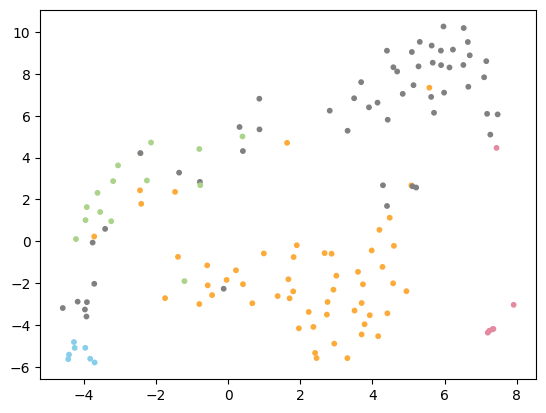

In [24]:
%matplotlib inline

X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
labelsNums = post_train_label
X_embedded= TSNE(n_components=2, init='random').fit_transform(X_np)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1] , c=labelsNums[:len(X_embedded)], s=10, cmap= cc , alpha=1 )


In [25]:
def clsembed(snippet):
    inputs = tokenizer(snippet, padding='max_length', max_length=218, truncation=True, return_tensors='pt').to(device)
    #tokens = [self.tokenizer.cls_token] + inputs  + [self.tokenizer.sep_token]
    if(len(inputs)<512):
        with torch.no_grad():
            outs = model_codebert(**inputs)
        cls = outs.last_hidden_state[:, 0, :].squeeze().detach()
        return cls
    else:
        print('longtest')
        i = 0
        part_vector =  []
        while ( i < len(inputs)-200) :
            #tokens = [self.tokenizer.cls_token] + inputs[i:i+250] +[self.tokenizer.sep_token]
            #tokens_ids= self.tokenizer.convert_tokens_to_ids(tokens)
            input_seg = [tokenizer.cls_token] + inputs[i:i+250] +[tokenizer.sep_token]
            with torch.no_grad():
                ots = model_codebert(**input_seg)
            cls = ots.last_hidden_state[:, 0, :].squeeze().detach()
            #cls = model_codebert(torch.tensor(inputs)[None,:])[1]
            #vector = cls[0].detach().numpy()
            parts.append(cls)
            i = i+100
        return parts

In [26]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
#labels_all = ['async wait','unordered collections','concurrency','time']
def get_class_rep(post_train_embed, post_train_label):
    # Move each tensor to CPU, convert to numpy, and collect in a list
    #post_train_embed = [x.cpu().numpy() for x in post_train_embed]
    # If you want to combine them into a single array (assuming they have the same shape)
    #post_train_embed = np.concatenate(post_train_embed, axis=0)
    representatives = [None] * 6
    for label in range(6):
        indices = np.where(np.atleast_1d(post_train_label) == label)[0]  # Get the indices as an array
        class_vectors = [post_train_embed[i] for i in indices]  # Access each index individually
        class_vectors = [x.cpu().numpy() for x in class_vectors]
        representatives[label] = np.mean(class_vectors, axis=0)
    return representatives

def calculate_normalized_distance(vec1, vec2):
    # Ensure vec1 and vec2 are numpy arrays
    if not isinstance(vec1, np.ndarray):
        vec1 = vec1.cpu().detach().numpy()
    if not isinstance(vec2, np.ndarray):
        vec2 = vec2.cpu().detach().numpy()
    
    # Normalize each vector to have unit length
    norm_vec1 = vec1 / np.linalg.norm(vec1)
    norm_vec2 = vec2 / np.linalg.norm(vec2)
    
    # Calculate Euclidean (L2) distance between the normalized vectors
    distance = np.linalg.norm(norm_vec1 - norm_vec2)
    
    return distance


In [27]:
int_to_label={
    0: 'OD',
    1: 'NIO',
    2: 'ID',
    3: 'NDOD',
    4: 'NOD',
    5: 'UD'
}


def get_closest_cluster(cluster_representatives, projected_vector):
    distances = [calculate_normalized_distance(rep, projected_vector) for rep in cluster_representatives]
    for i in range(len(distances)):
        distances[i] = np.mean(distances[i])
    closest_cluster_idx = np.argmin(distances)
    return int_to_label[closest_cluster_idx]

In [28]:
embed = post_train_embed
labels = post_train_label
def predict(input_vector):
    modified_vector = siamese_network(input_vector)
    representatives = get_class_rep(embed, labels)
    return get_closest_cluster(representatives, modified_vector)
    


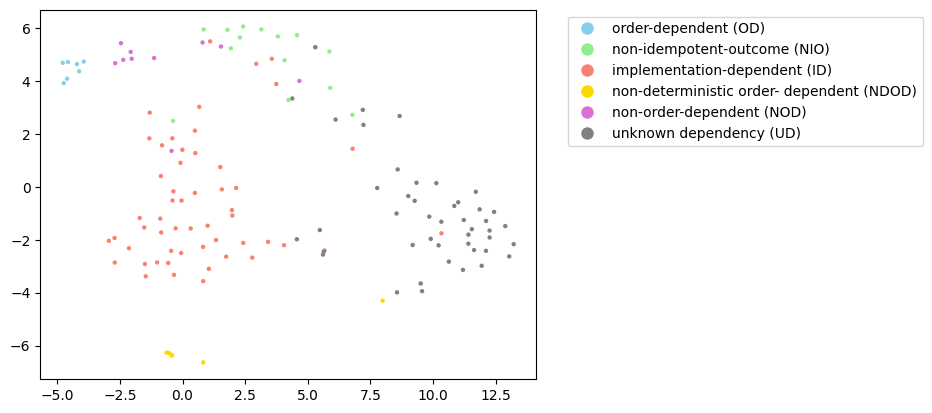

In [29]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

# Assuming post_train_embed and post_train_label are defined
X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
labelsNums = post_train_label

# Define vibrant colors for each category (same as used in the bar plot)
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']

# Ensure labels are within the range of colors [0, 1, 2, 3, 4]
# Filter out invalid labels (-1) and keep only valid labels [0, 1, 2, 3, 4]
valid_indices = [i for i, label in enumerate(labelsNums) if label in [0, 1, 2, 3, 4, 5]]
X_np_filtered = X_np[valid_indices]
labelsNums_filtered = [labelsNums[i] for i in valid_indices]

# Dimensionality reduction with t-SNE
X_embedded = TSNE(n_components=2, init='random').fit_transform(X_np_filtered)

# Scatter plot
for i, label in enumerate(labelsNums_filtered):
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=colors[label], s=10, alpha=1, edgecolor='none', marker='o')

# Create legend with category labels
legend_labels = ['order-dependent (OD)', 'non-idempotent-outcome (NIO)', 'implementation-dependent (ID)', 'non-deterministic order- dependent (NDOD)', 'non-order-dependent (NOD)', 'unknown dependency (UD)']
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors], labels=legend_labels,bbox_to_anchor=(1.05, 1), 
                    loc='upper left')

plt.show()


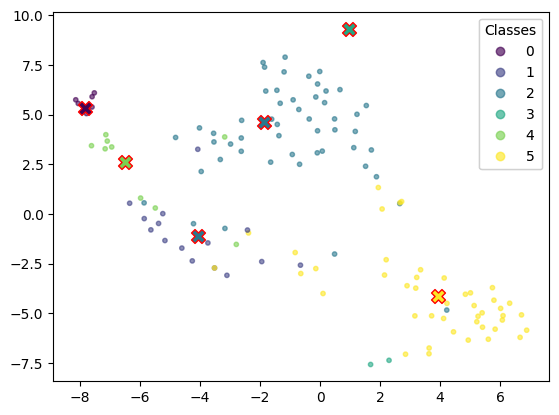

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import torch

# Assuming post_train_embed, post_train_label, and labelsNums are defined
X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
X_embedded = TSNE(n_components=2, init='random').fit_transform(X_np)

# Plot the data points
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labelsNums[:len(X_embedded)], s=10, cmap='viridis', alpha=0.6)

# Calculate class representatives
representatives = get_class_rep(post_train_embed, post_train_label)  # Make sure this function returns what you expect

# Get unique labels and their colors from the scatter plot
unique_labels = np.unique(labelsNums[:len(X_embedded)])
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

# For each class representative, find the closest point and plot it
for i, rep in enumerate(representatives):
    if rep is not None:
        # Find the closest data point in the original space to this representative
        distances = np.linalg.norm(X_np - rep, axis=1)
        closest_point_index = np.argmin(distances)
        # Use the label of the closest data point to get the correct color
        label_of_closest = labelsNums[closest_point_index]
        color = scatter.cmap(scatter.norm(label_of_closest))
        plt.scatter(X_embedded[closest_point_index, 0], X_embedded[closest_point_index, 1], color=color, edgecolors='red', s=100, marker='X')

# You might want to adjust the legend to make sure it correctly represents your data
# plt.legend()
plt.show()


In [31]:
# from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# # Assuming 'X_embedded' is your t-SNE result and 'labelsNums' are your labels

# # Silhouette Score:
# # - Measures how similar an object is to its own cluster compared to other clusters.
# # - Range: -1 (incorrect clustering) to 1 (highly dense clustering). 
# #   A score close to 1 means that the clusters are well separated and clearly defined.
# silhouette_avg = silhouette_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Silhouette Score: {silhouette_avg}")

# # Davies-Bouldin Index:
# # - Evaluates the clustering quality by measuring the average 'similarity' between each cluster 
# #   and its most similar one. The similarity is based on a ratio of within-cluster distances to between-cluster distances.
# # - Range: 0 to +∞. Lower scores indicate better clustering quality.
# davies_bouldin = davies_bouldin_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Davies-Bouldin Index: {davies_bouldin}")

# # Calinski-Harabasz Index:
# # - Measures the cluster validity based on the ratio between the within-cluster dispersion and the between-cluster dispersion.
# # - Range: Higher values indicate better clustering quality, with no upper limit. Low values indicate clusters with high overlap.
# calinski_harabasz = calinski_harabasz_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Calinski-Harabasz Index: {calinski_harabasz}")


In [32]:
from sklearn.metrics import f1_score

int_to_label={
    0: 'OD',
    1: 'NIO',
    2: 'ID',
    3: 'NDOD',
    4: 'NOD',
    5: 'UD'
}

label_to_int = {v: k for k, v in int_to_label.items()}  # Create reverse mapping

count = 0

# Assuming val_dataset is iterable and has 'anchor' and 'label' keys
predicted_labels = []
true_labels = []

for item in val_dataset:
    count += 1
    input_vector = item['anchor']  # Your input vector for prediction
    
    # Get predicted cluster/label
    predicted_label_str = predict(input_vector)
    
    # Ensure predicted_label is in the valid range
    if predicted_label_str in label_to_int:
        predicted_label = label_to_int[predicted_label_str]
        predicted_labels.append(predicted_label)
    else:
        print(f"Warning: Encountered unknown predicted label {predicted_label_str}")
        continue

    # True label
    true_label_int = int(item['label'])  # Assuming 'label' contains the true label as integer
    if true_label_int in int_to_label:
        true_labels.append(true_label_int)
    else:
        print(f"Warning: Encountered unknown true label {true_label_int}")
        continue

    print(count, "Predicted:", predicted_label, "True:", true_label_int)

# Filter out any invalid entries where predicted or true labels are missing
valid_indices = [i for i in range(len(true_labels)) if true_labels[i] in int_to_label and predicted_labels[i] in int_to_label]
filtered_true_labels = [true_labels[i] for i in valid_indices]
filtered_predicted_labels = [predicted_labels[i] for i in valid_indices]

print("Loop completed")

# Calculate F1 Score, ignoring unknown labels
f1 = f1_score(filtered_true_labels, filtered_predicted_labels, average='weighted', zero_division=0)  # Adjust 'average' as necessary
print(f"F1 Score: {f1}")


1 Predicted: 2 True: 2
2 Predicted: 2 True: 2
3 Predicted: 2 True: 2
4 Predicted: 5 True: 2
5 Predicted: 5 True: 5
6 Predicted: 5 True: 5
7 Predicted: 5 True: 5
8 Predicted: 2 True: 2
9 Predicted: 2 True: 1
10 Predicted: 2 True: 0
11 Predicted: 2 True: 2
12 Predicted: 5 True: 5
13 Predicted: 5 True: 5
14 Predicted: 5 True: 5
15 Predicted: 2 True: 2
16 Predicted: 4 True: 4
17 Predicted: 1 True: 1
18 Predicted: 1 True: 5
19 Predicted: 0 True: 2
20 Predicted: 5 True: 5
21 Predicted: 5 True: 5
22 Predicted: 2 True: 2
23 Predicted: 2 True: 1
24 Predicted: 1 True: 2
25 Predicted: 5 True: 2
26 Predicted: 5 True: 5
27 Predicted: 3 True: 3
28 Predicted: 5 True: 5
29 Predicted: 4 True: 4
30 Predicted: 5 True: 2
31 Predicted: 0 True: 0
32 Predicted: 1 True: 1
33 Predicted: 1 True: 5
34 Predicted: 2 True: 2
Loop completed
F1 Score: 0.7071895424836602


              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.40      0.50      0.44         4
           2       0.73      0.62      0.67        13
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       0.77      0.83      0.80        12

    accuracy                           0.71        34
   macro avg       0.73      0.74      0.74        34
weighted avg       0.71      0.71      0.71        34


 - Accuracy :  0.71
 - Precision :  0.71
 - Recall :  0.71
 - F1 score :  0.71
 - MCC :  0.59
 - AUC :  0.79


Performances by categories



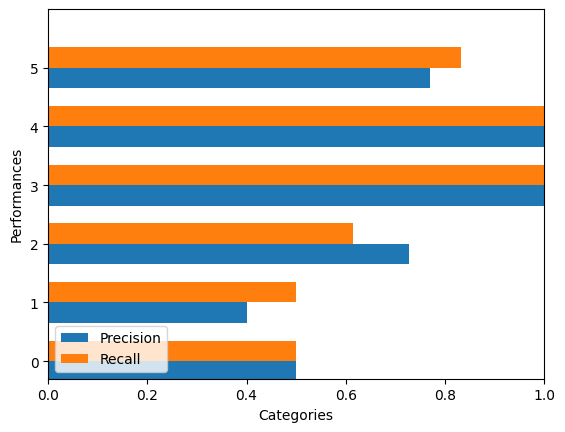



Confusion Matrix 


<AxesSubplot:>

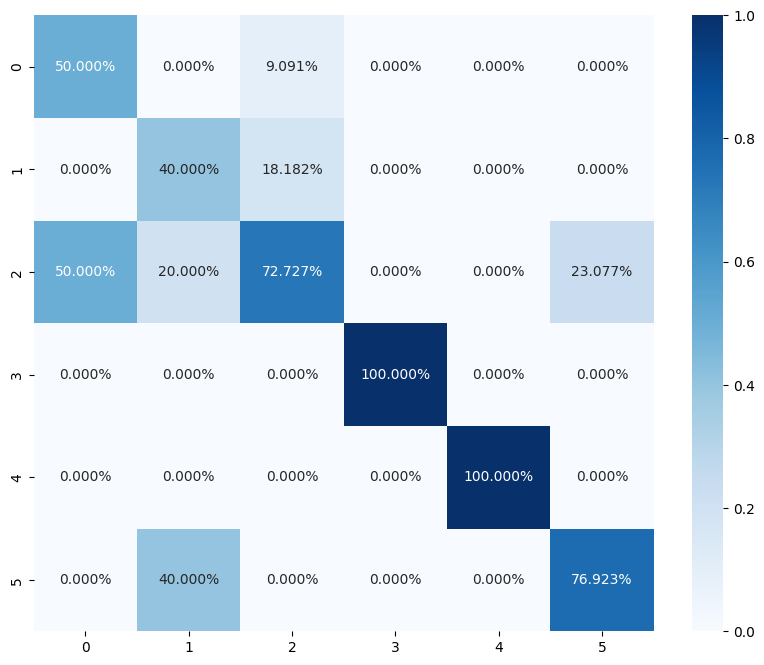

In [33]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

%matplotlib inline
warnings.filterwarnings("ignore")

def multiclass_roc_auc_score(truth, pred, average="weighted"):
    lb = LabelBinarizer()
    lb.fit(truth)
    truth = lb.transform(truth)
    pred = lb.transform(pred)
    return roc_auc_score(truth, pred, average=average)

# Assuming predicted_labels and true_labels are already defined
predicted = predicted_labels
labels = true_labels

# Filter out 'unknown' labels
valid_indices = [i for i, label in enumerate(labels) if label != 'unknown']
filtered_labels = [labels[i] for i in valid_indices]
filtered_predicted = [predicted[i] for i in valid_indices]

unique_labels = list(set(filtered_labels))
print(classification_report(filtered_labels, filtered_predicted))

print('\n - Accuracy : ', np.round(metrics.accuracy_score(filtered_labels, filtered_predicted), 2))
print(' - Precision : ', np.round(metrics.precision_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - Recall : ', np.round(metrics.recall_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - F1 score : ', np.round(metrics.f1_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - MCC : ', np.round(metrics.matthews_corrcoef(filtered_labels, filtered_predicted), 2))
print(' - AUC : ', np.round(multiclass_roc_auc_score(filtered_labels, filtered_predicted), 2))

print("\n\nPerformances by categories\n")

ind = np.arange(len(unique_labels)) 
width = 0.35
fig, ax = plt.subplots()
precision = metrics.precision_recall_fscore_support(filtered_labels, filtered_predicted, labels=unique_labels)[0]
recall = metrics.precision_recall_fscore_support(filtered_labels, filtered_predicted, labels=unique_labels)[1]
ax.barh(ind - width/2, precision, width, label='Precision')
ax.barh(ind + width/2, recall, width, label='Recall')
ax.set(yticks=ind, yticklabels=np.array(unique_labels), ylim=[2*width - 1, len(ind)])
plt.xlim(0, 1)
ax.legend(loc='lower left')
ax.set_ylabel("Performances")
ax.set_xlabel("Categories")
plt.show()

print("\n\nConfusion Matrix ")

mat = confusion_matrix(filtered_labels, filtered_predicted, labels=unique_labels)
df_cm = pd.DataFrame(mat, index=[i for i in unique_labels], columns=[i for i in unique_labels])
plt.figure(figsize=(10, 8))
sn.heatmap(df_cm / np.sum(df_cm), annot=True, fmt='.3%', cmap='Blues')


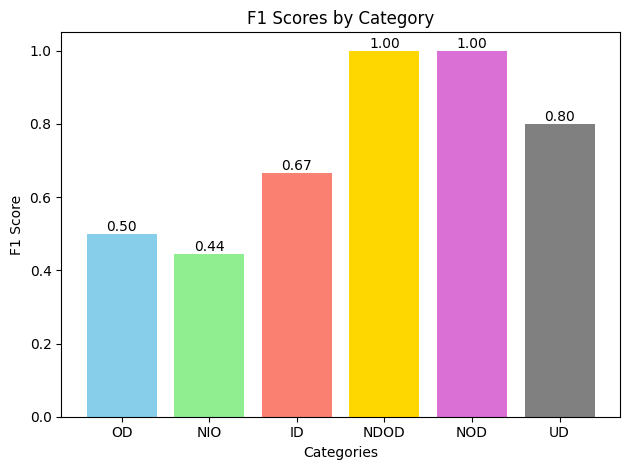

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Assuming you have the predicted and true labels as per your previous code
# predicted_labels and true_labels should be lists of labels
int_to_label={
    0: 'OD',
    1: 'NIO',
    2: 'ID',
    3: 'NDOD',
    4: 'NOD',
    5: 'UD'
}

# Shortened category names
shortened_labels = {
    'OD': 'OD',
    'NIO': 'NIO',
    'ID': 'ID',
    'NDOD': 'NDOD',
    'NOD': 'NOD',
    'UD': 'UD'
}

# Filter out invalid labels from both true and predicted labels
valid_indices = [i for i in range(len(true_labels)) if true_labels[i] in int_to_label.keys() and predicted_labels[i] in int_to_label.keys()]
filtered_true_labels = [true_labels[i] for i in valid_indices]
filtered_predicted_labels = [predicted_labels[i] for i in valid_indices]

# Calculate F1 scores for each category
f1_scores = []
categories = list(int_to_label.keys())
for category in categories:
    true_bin = [1 if label == category else 0 for label in filtered_true_labels]
    pred_bin = [1 if label == category else 0 for label in filtered_predicted_labels]
    f1 = f1_score(true_bin, pred_bin, zero_division=0)
    f1_scores.append(f1)

# Define vibrant colors for each category
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']

# Create bar plot with shortened category names and vibrant colors
shortened_categories = [shortened_labels[int_to_label[category]] for category in categories]
fig, ax = plt.subplots()
bars = ax.bar(shortened_categories, f1_scores, color=colors)

# Add F1 scores on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 0),  
                textcoords="offset points", ha='center', va='bottom')

# Customize the plot
ax.set_xlabel('Categories')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores by Category')

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [35]:
# file_path = 'test_data_predictions.csv'

# # Load the compressed CSV file into a DataFrame
# df = pd.read_csv(file_path)

# # Extract the 'TrueLabel' and 'PredictedLabel' columns into separate variables
# labels_flaky = df['TrueLabel'].tolist()
# predicted_flaky = df['PredictedLabel'].tolist()

# print (classification_report(labels, predicted))

# print('\n - Accuracy : ' , np.round( metrics.accuracy_score(labels_flaky,  predicted_flaky) , 2))
# print(' - Precision : ' , np.round( metrics.precision_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - Recall : ' , np.round( metrics.recall_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - F1 score : ' , np.round( metrics.f1_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - MCC : ' , np.round( metrics.matthews_corrcoef(labels_flaky,  predicted_flaky) , 2))
# print(' - AUC : ' , np.round( multiclass_roc_auc_score(labels_flaky,  predicted_flaky),2) )

# print("\n\nPerfomnaces by categories\n")


# ind = np.arange(len(unique_labels)) 
# width = 0.35
# fig, ax = plt.subplots()
# precision = metrics.precision_recall_fscore_support(labels_flaky,  predicted_flaky ,  labels=unique_labels )[0]
# recall = metrics.precision_recall_fscore_support(labels_flaky,  predicted_flaky ,  labels=unique_labels )[1]
# ax.barh(ind - width/2, precision, width, label='Precision')
# ax.barh(ind + width/2, recall, width, label='Recall')
# ax.set(yticks=ind + width, yticklabels=np.array(unique_labels),
# ylim=[2*width - 1, len(ind)])
# plt.xlim(0,1)
# ax.legend(loc='upper right')
# ax.set_xlabel("Performances")
# ax.set_ylabel("Categories")
# plt.show()

# print("\n\nConfusion Matrix ")

# mat = confusion_matrix(labels_flaky,  predicted_flaky, labels=unique_labels)
# df_cm = pd.DataFrame(mat, index = [i for i in unique_labels], columns = [i for i in unique_labels])
# plt.figure(figsize = (10,8))
# sn.heatmap(df_cm/np.sum(df_cm), annot=True, fmt='.3%', cmap='Blues')

In [36]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn import metrics

# precision_our_model = metrics.precision_recall_fscore_support(labels, predicted, labels=unique_labels)[0]
# recall_our_model = metrics.precision_recall_fscore_support(labels, predicted, labels=unique_labels)[1]
# # And assuming 'unique_labels' is defined as before

# ind = np.arange(len(unique_labels))  # the x locations for the groups
# width = 0.2  # the width of the bars

# fig, ax = plt.subplots(figsize=(14, 10))  # Adjust the figure size as needed

# # Using a set of contrasting, darker colors
# colors = ['blue', 'green', 'red', 'orange']

# # Plotting Precision and Recall for Your Model
# rects1 = ax.bar(ind - width*1.5, precision_our_model, width, label='Our Precision', color=colors[0])
# rects2 = ax.bar(ind - width/2, recall_our_model, width, label='Our Recall', color=colors[1])

# # Plotting Precision and Recall for Flaky Model
# rects3 = ax.bar(ind + width/2, precision_flaky, width, label='FlakyCat Precision', color=colors[2])
# rects4 = ax.bar(ind + width*1.5, recall_flaky, width, label='FlakyCat Recall', color=colors[3])

# # Add some text for labels, title, and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Class-wise Precision and Recall for Our Model vs. FlakyCat Model')
# ax.set_xticks(ind)
# ax.set_xticklabels(unique_labels, rotation=45, ha="right")  # Rotate for better label visibility
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place the legend outside the figure

# # Optional: Adding scores above bars
# ax.bar_label(rects1, padding=3, fmt='%.2f')
# ax.bar_label(rects2, padding=3, fmt='%.2f')
# ax.bar_label(rects3, padding=3, fmt='%.2f')
# ax.bar_label(rects4, padding=3, fmt='%.2f')

# fig.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect to make space for the legend outside

# plt.show()


In [37]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming metrics have been calculated and stored in variables for both models.
# # Example metric variables: accuracy, precision, recall, f1_score, mcc, auc for the original model
# # And similarly named variables with a '_flaky' suffix for the comparison model.

# metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC']
# your_model_metrics = [
#     np.round(metrics.accuracy_score(labels, predicted), 2),
#     np.round(metrics.precision_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.recall_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.f1_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.matthews_corrcoef(labels, predicted), 2),
#     np.round(multiclass_roc_auc_score(labels, predicted), 2)
# ]

# flaky_model_metrics = [
#     np.round(metrics.accuracy_score(labels_flaky, predicted_flaky), 2),
#     np.round(metrics.precision_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.recall_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.f1_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.matthews_corrcoef(labels_flaky, predicted_flaky), 2),
#     np.round(multiclass_roc_auc_score(labels_flaky, predicted_flaky), 2)
# ]

# x = np.arange(len(metrics_labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, your_model_metrics, width, label='Our Model')
# rects2 = ax.bar(x + width/2, flaky_model_metrics, width, label='FlakyCat Model')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Metrics Comparison between Our Model and FlakyCat Model')
# ax.set_xticks(x)
# ax.set_xticklabels(metrics_labels)
# ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

# fig.tight_layout()

# plt.show()


In [38]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# def extract_projections(siamese_network, dataloader):
#     projections = []
#     labels = []
#     for batch in dataloader:
#         label = batch["label"]
#         anchor = batch["anchor"]
#         projection = siamese_network(anchor)
        
#         projections.append(projection.cpu().detach().numpy())
#         labels.append(label.numpy())
#     projections = np.vstack(projections)
#     labels = np.hstack(labels)
#     return projections, labels

In [39]:
# projections, labels = extract_projections(siamese_network, train_dataloader)
# val_projections, val_labels = extract_projections(siamese_network, val_dataloader)

In [40]:
# print(len(projections), len(train_dataloader))

In [41]:
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(projections, labels)

# # Train SVM Classifier
# svm_classifier = SVC(kernel='linear', random_state=42)
# svm_classifier.fit(projections, labels)

In [42]:
# # Evaluate Random Forest Classifier
# rf_predictions = rf_classifier.predict(val_projections)
# rf_accuracy = accuracy_score(val_labels, rf_predictions)
# rf_f1 = f1_score(val_labels, rf_predictions, average='weighted')
# print(f"Random Forest Classifier Accuracy: {rf_accuracy}, F1: {rf_f1}")

# # Evaluate SVM Classifier
# svm_predictions = svm_classifier.predict(val_projections)
# svm_accuracy = accuracy_score(val_labels, svm_predictions)
# svm_f1 = f1_score(val_labels, svm_predictions, average='weighted')
# print(f"SVM Classifier Accuracy: {svm_accuracy}, F1:{svm_f1}")